# HW 2: Types of Data

#### CPE232 Data Models

---


# Import Dependency


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Part 1 : Basic Python


## Task 1


Perform the following:

- Write a program to get input of different types from the user.
- Display type of each variable.
- Convert a variable of the type float to Integer.
- Demonstrate a comparison of before vs after the type conversion.


In [6]:
# Input values from the user
string_value = input("Enter a string: ")
integer_value = int(input("Enter an integer: "))
float_value = float(input("Enter a float: "))

In [7]:
# Display the data types
print("string_value:", string_value, type(string_value))
print("integer_value:", integer_value, type(integer_value))
print("float_value:", float_value, type(float_value))

string_value: 123123 <class 'str'>
integer_value: 123123 <class 'int'>
float_value: 31232132.1321312 <class 'float'>


In [8]:
# Convert integer to float and vice versa
integer_as_float = float(integer_value)
float_as_int = int(float_value)

print("integer_value as float:", integer_as_float, type(integer_as_float))
print("float_value as int:", float_as_int, type(float_as_int))

integer_value as float: 123123.0 <class 'float'>
float_value as int: 31232132 <class 'int'>


In [9]:
# Show before and after convert float to int
before = float_value
after = int(float_value)

print("Before conversion (float):", before)
print("After conversion (int):", after)
print("Note: decimal part is removed during conversion.")

Before conversion (float): 31232132.1321312
After conversion (int): 31232132
Note: decimal part is removed during conversion.


## Task 2


Given a dictionary of students with their scores, find the average score of each student across all subjects and identify the student with the highest average score.


In [10]:
students_grades = {
    "John": [85, 90, 78],
    "Alice": [88, 92, 80],
    "Bob": [75, 85, 72],
    "Diana": [90, 95, 94],
    "Charlie": [70, 65, 80],
}

In [11]:
# Calculate and print the average grade for each student
average_grades = {}
for name, grades in students_grades.items():
    avg = sum(grades) / len(grades)
    average_grades[name] = avg
    print(f"{name}: average score = {avg:.2f}")

John: average score = 84.33
Alice: average score = 86.67
Bob: average score = 77.33
Diana: average score = 93.00
Charlie: average score = 71.67


In [12]:
# Find the student with the highest average grade
best_student = max(average_grades, key=average_grades.get)
best_average = average_grades[best_student]

print(f"Top student: {best_student} with average score {best_average:.2f}")

Top student: Diana with average score 93.00


# Part 2 : Working with CSV!


Add a new column to this CSV file named "Bonus," and calculate the bonus for employees in the Sales department as 10% of their MonthlyRate.


In [18]:
# Load the CSV file
file_path = "employee_data.csv"
df = pd.read_csv(file_path)

In [19]:
df.head()

,Age,DailyRate,Department,EducationField,Gender,MaritalStatus,MonthlyRate,OverTime
0,41,1102,Sales,Life Sciences,Female,Single,19479,Yes
1,49,279,Research & Development,Life Sciences,Male,Married,24907,No
2,37,1373,Research & Development,Other,Male,Single,2396,Yes
3,33,1392,Research & Development,Life Sciences,Female,Married,23159,Yes
4,27,591,Research & Development,Medical,Male,Married,16632,No


In [20]:
# Add new column call 'Bonus'
df["Bonus"] = 0.0

In [21]:
# Calculate 10% of bonus into the 'Bonus' Column
sales_mask = df["Department"] == "Sales"
df.loc[sales_mask, "Bonus"] = df.loc[sales_mask, "MonthlyRate"] * 0.10

In [23]:
# Print and show result
print(df[["Department", "MonthlyRate", "Bonus"]].head())

               Department  MonthlyRate   Bonus
0                   Sales        19479  1947.9
1  Research & Development        24907     0.0
2  Research & Development         2396     0.0
3  Research & Development        23159     0.0
4  Research & Development        16632     0.0


In [24]:
# Save the updated DataFrame back to a CSV file
output_path = "employee_data_with_bonus.csv"
df.to_csv(output_path, index=False)
print(f"Updated data with bonus saved to {output_path}")

Updated data with bonus saved to employee_data_with_bonus.csv


# Part 3 : Working with Matplotlib


Plot a graph showing the average salary of employees in each department to compare the average salaries across departments.


In [25]:
# Load CSV and create DataFrame
data = pd.read_csv("employee_data.csv")
df = pd.DataFrame(data)

In [26]:
# Calculate average MonthlyRate by Department
avg_salary_by_dept = df.groupby("Department")["MonthlyRate"].mean()

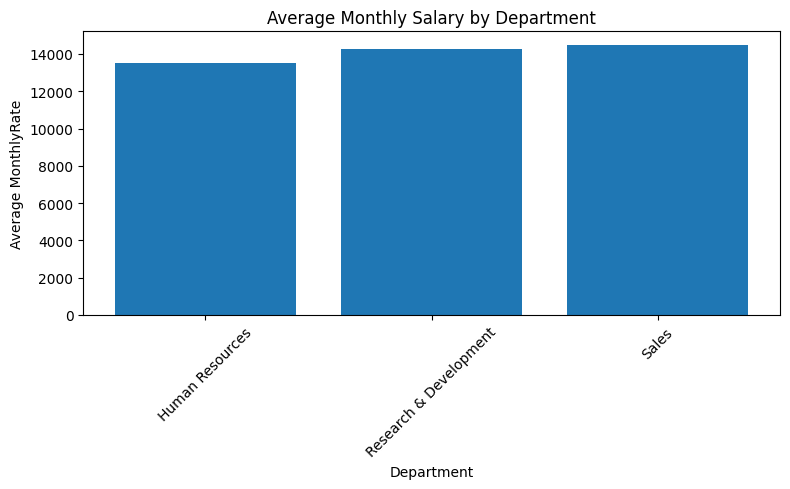

In [28]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_by_dept.index, avg_salary_by_dept.values)
plt.xlabel("Department")
plt.ylabel("Average MonthlyRate")
plt.title("Average Monthly Salary by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Challenge!!! : Working with SATAN (Optional)


Great job, for not giving up on this subject!

<div>
<img src="https://media2.giphy.com/media/ErZ8hv5eO92JW/200.gif?cid=6c09b952k9ykzx0na1tsrm5sa0gb4m4z39w5z6z65u05oohs&ep=v1_gifs_search&rid=200.gif&ct=g" width="500"/>
</div>


Here’s the story: The CSV file that was given to you isn’t just an ordinary file -- it’s data from an organization where Alya-San works!

<div>
<img src="https://preview.redd.it/all-hail-alya-v0-8tiwrh5d3b3e1.jpeg?auto=webp&s=f22e38e7544697d75f2264f005504e5eb81a9721" width="500"/>
</div>


Alya feels that something suspicious is going on within the company. She suspects that there’s inequality in salaries between male and female employees.

She also wonders if the government might be intervening to encourage population growth by secretly increasing the salaries of married employees compared to those who are single.

Additionally, how much of a difference is there in salaries between employees who graduated from different fields of study?

Can you help Alya prove whether her suspicions are just in her head or if they’re actually true?

For Aria, everyone is truly **e q u a l**.


In [38]:
class EmployeeSalaryAnalyzer:
    """salary analysis logic for employee data."""

    def __init__(self, csv_path: str) -> None:
        self._csv_path = csv_path
        self._df = pd.read_csv(self._csv_path)

    def average_by_gender(self):
        return self._df.groupby("Gender")["MonthlyRate"].mean()

    def average_by_marital_status(self):
        return self._df.groupby("MaritalStatus")["MonthlyRate"].mean()

    def average_by_education_field(self, descending: bool = True):
        return (
            self._df.groupby("EducationField")["MonthlyRate"]
            .mean()
            .sort_values(ascending=not descending)
        )

    def print_report(self) -> None:
        gender_avg = self.average_by_gender()
        print("Average MonthlyRate by Gender:")
        print(gender_avg)
        print()

        marital_avg = self.average_by_marital_status()
        print("Average MonthlyRate by Marital Status:")
        print(marital_avg)
        print()

        edu_avg = self.average_by_education_field(descending=True)
        print("Average MonthlyRate by Education Field (sorted):")
        print(edu_avg)


analyzer = EmployeeSalaryAnalyzer("employee_data.csv")
analyzer.print_report()

Average MonthlyRate by Gender:
Gender
Female    14674.600340
Male      14072.105442
Name: MonthlyRate, dtype: float64

Average MonthlyRate by Marital Status:
MaritalStatus
Divorced    14310.085627
Married     14044.502229
Single      14699.817021
Name: MonthlyRate, dtype: float64

Average MonthlyRate by Education Field (sorted):
EducationField
Human Resources     14810.740741
Life Sciences       14530.132013
Medical             14295.056034
Technical Degree    14210.363636
Marketing           14076.943396
Other               13270.780488
Name: MonthlyRate, dtype: float64


Since Kobayashi-san will be reviewing your code, please present the data in a way that is clear and accurate. Otherwise, Kobayashi-san might fire you from the company!

<div>
<img src="https://i.redd.it/gwmyhe5g0av71.gif" width="500"/>
</div>
